# Introduction
In this notebook we consider data that is not linear seperable. Using feature transforms we see how to apply linear models to non-linearly seperable data. Experiments are carried out with Perceptron, Linear Regression and Logistic Regression. 

- Algorithms: Perceptron, Linear Regression and Logistic Regression
- DataSets:   "non_linear_seperable" and "dogs_vs_cats"
- Video: To Be Added

# Feature Transform
Imagine we had data like the circles below. Run the following code to see an example

<IPython.core.display.Javascript object>


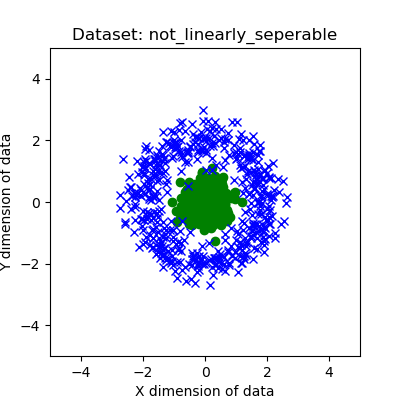

In [1]:
import ipython_import_class
import DataSet as ds

data = ds.DataSet("not_linearly_seperable", 1000, xlim=[-5, 5], ylim=[-5,5])  
data.plot()

It is impossible to seperate this data by a line! Any of the algorithms we saw will fail miserably. Let's try to see how bad the Pocket algorithm does

<IPython.core.display.Javascript object>


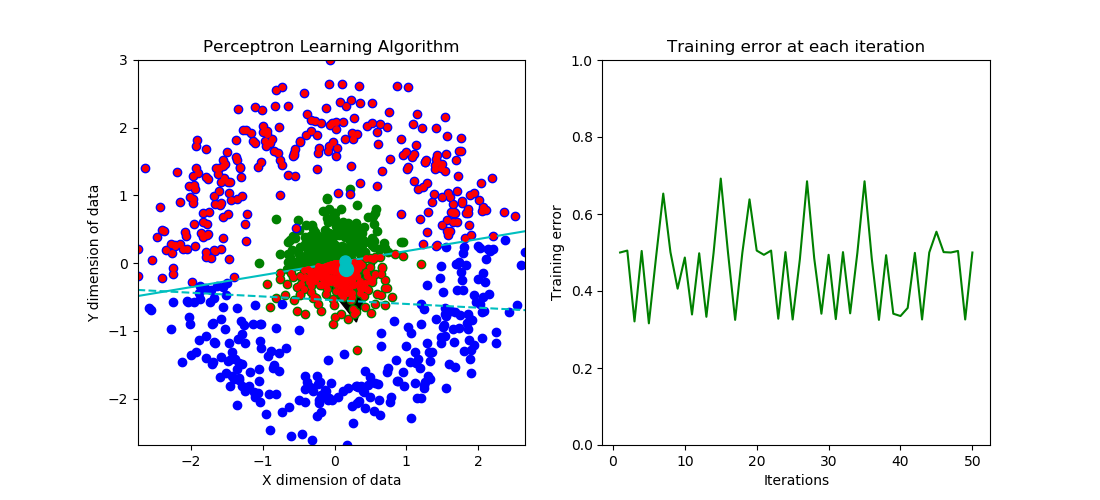

Classsification Error: 	 0.316


In [2]:
import ipython_import_class
import Perceptron 

pocket = Perceptron.Pocket(visualize=True)
pocket.fit(data.X, data.y, T=50)
print("Classsification Error: \t", pocket.classification_error(data.X, data.y))

Imagine if we took each datapoint $x_i=(a, b)$ and replaced it by $\hat{x_i}=(a^2, b^2)$. What would happen? We can do this in python this by writing 

      `data.X**2`
    
 Try to run the following code to see what happens!

<IPython.core.display.Javascript object>


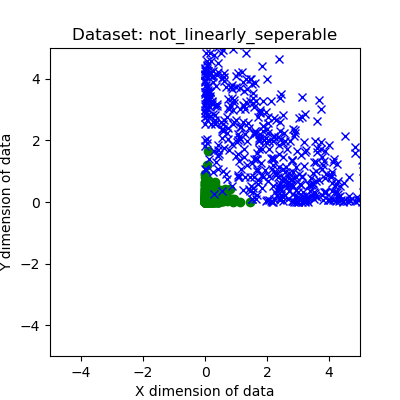

In [3]:
data.X = data.X**2
data.plot()

The data got almost linearly seperable! Let's try to run the Pocket algorithm on this new data

<IPython.core.display.Javascript object>


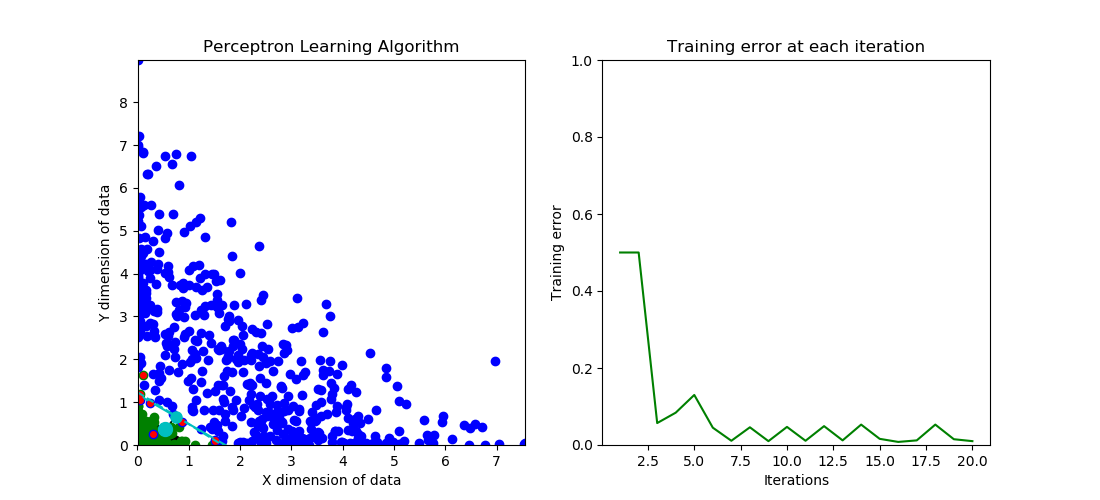

Classification Error: 	 0.008


In [4]:
pocket = Perceptron.Pocket(visualize=True)
pocket.fit(data.X, data.y, T=20)
print("Classification Error: \t", pocket.classification_error(data.X, data.y))

This should give around 0% error, an almost perfect classification! The two other linear algorithms also classifies the data close to perfect!

In [6]:
import ipython_import_class

import LogisticRegression
import LinearRegression 

linreg = LinearRegression.LinearRegressionClassification()
linreg.fit(data.X, data.y)
print("Linear Regression: \t", linreg.classification_error(data.X, data.y))

logreg = LogisticRegression.LogisticRegressionSave(learning_rate=0.0001)
logreg.fit(data.X, data.y, rounds=100)
print("Logistic Regression: \t", logreg.classification_error(data.X, data.y))

Linear Regression: 	 0.036
Logistic Regression: 	 0.008


Both models should get almost perfect accuracy! This trick is called Feature Transform because we transform the features of our data. 

# Visualizing Feature Transforms
In previous section we transformed our data $D=\{(x_1, y_1),...,(x_N, y_N)\}$ to $D_t=\{(\phi(x_1), y_1), ..., (\phi(x_N), y_N)\}$ where

$$\phi\begin{pmatrix}a\\b\end{pmatrix}=\begin{pmatrix}a^2\\b^2\end{pmatrix}$$

Consider the inverse transform 

$$\phi^{-1}\begin{pmatrix}a\\b\end{pmatrix}=\begin{pmatrix}\pm \sqrt{a}\\\pm\sqrt{ b}\end{pmatrix}$$

By training on transformed data $D_t$ we will get a hyperplane that performs well on the transformed data. By using the inverse transform $\phi^{-1}$ we can find the corresponding hyperplane in the original space. The following code visualizes this for the Pocket algorithm. The mathematics will be explained below. 

<IPython.core.display.Javascript object>


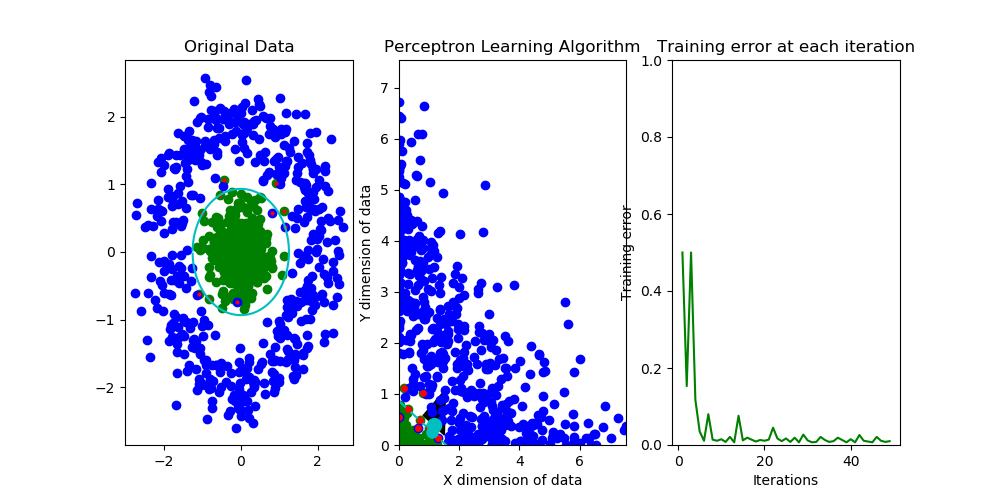

hide_ft_visualization_code.ipynb:61: RuntimeWarning: invalid value encountered in double_scalars
  "        \n",
hide_ft_visualization_code.ipynb:62: RuntimeWarning: invalid value encountered in double_scalars
  "        self.ax_original_data.plot(X_class1[:,1], X_class1[:,2], 'go')\n",
hide_ft_visualization_code.ipynb:63: RuntimeWarning: invalid value encountered in sqrt
  "        self.ax_original_data.plot(X_class2[:,1], X_class2[:,2], 'bo')\n",
hide_ft_visualization_code.ipynb:64: RuntimeWarning: invalid value encountered in sqrt
  "\n",


Classsification Error: 	 0.007


In [7]:
import ipython_import_class
import hide_ft_visualization_code

data = ds.DataSet("not_linearly_seperable", 1000, xlim=[-5, 5], ylim=[-5,5])  

pocket = hide_ft_visualization_code.PocketVisualizeFT(sleep=5)
pocket.fit(data.X, data.y, T=50)
print("Classsification Error: \t", pocket.classification_error(data.X**2, data.y))

TODO: add explanation of how I computed hyperplane in original space.

# Todo: Add Visualization For Linear Regression (easy, same as perceptron) and one for Logistic Regression (a bit harder)

# Experiment: Dogs vs Cats
Try to run the following code to visualize a sample from the `dogs_vs_cats` dataset [1].

<IPython.core.display.Javascript object>


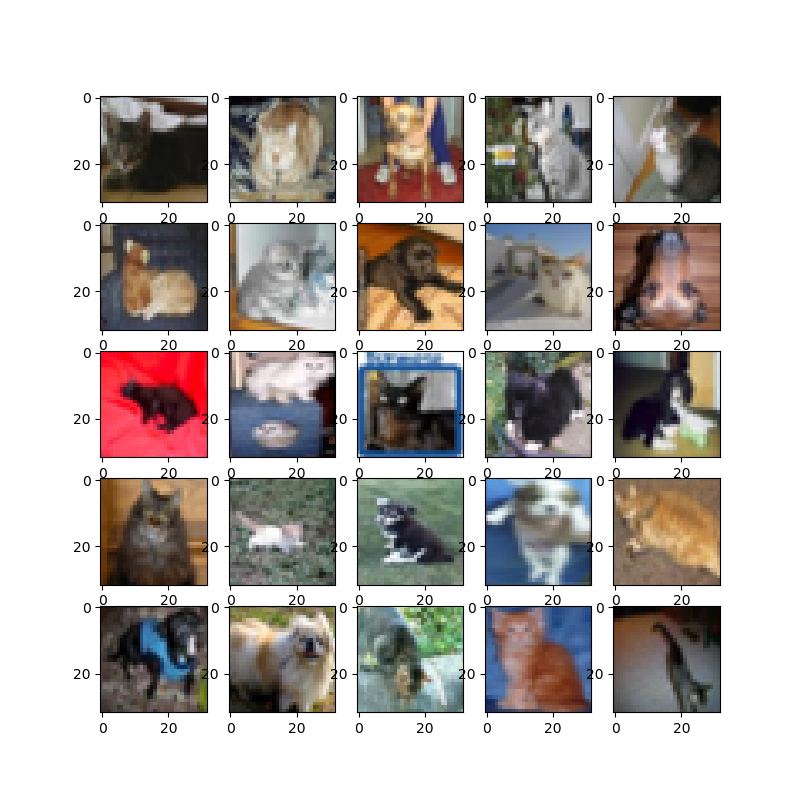

In [8]:
import ipython_import_class
import DataSet as ds

data = ds.DataSet("cats_vs_dogs")
data.show_cats_vs_dogs()

Let us try to train Linear Regression on this dataset and see how well it does. We start with Linear Regression because it has no parameters we need to set. It might take a few seconds to run. 

In [10]:
import ipython_import_class
import LinearRegression
import numpy as np

linreg = LinearRegression.LinearRegressionClassification()
linreg.fit(data.X, data.y)

print("Linear Regression: \t", linreg.classification_error(data.X, data.y))

Linear Regression: 	 0.517665130568


When I ran this I got 50%. This is very bad. Consider how many cats and dogs there are in the dataset

In [11]:
print("Number cats: \t\t%i/%i"% (sum(data.y==0), data.y.size), "\t",round(sum(data.y==0)/data.y.size, 3),"%")
print("Number of dogs: \t%i/%i"%(sum(data.y==1), data.y.size), "\t",round(sum(data.y==1)/data.y.size, 3),"%")

Number cats: 		937/1953 	 0.48 %
Number of dogs: 	1016/1953 	 0.52 %


In other words. If we just said every image was a dog we would get only $48$% error and do better. One might try to normalize the mean and standard deviation of the data.

In [12]:
data = ds.DataSet("cats_vs_dogs")

print("Original Mean: \t\t", round(np.mean(data.X), 4))
print("Original Stddev: \t", round(np.std(data.X), 4))
data.X = (data.X - np.mean(data.X)) / np.std(data.X) 
print("New Mean: \t\t", round(np.mean(data.X), 4))
print("New Stddev: \t\t", round(np.std(data.X), 4))

linreg = LinearRegression.LinearRegressionClassification()
linreg.fit(data.X, data.y)
print("\nLinear Regression: \t", linreg.classification_error(data.X, data.y))

Original Mean: 		 116.6876
Original Stddev: 	 64.6259
New Mean: 		 0.0
New Stddev: 		 1.0

Linear Regression: 	 0.506400409626


When I ran this I got 50.6% error. It might be possible to improve performance by using Logistic Regression and experimenting with different values for `rounds` and `learning_rate`. If you try this out, be aware that `LogisticRegression` will consume a lot of time. Fortunately, a very simple trick can drastically reduce time consumption. This will be the topic of a later notebook, for now see [2] for the rough idea. 

Even if we fixed the above problems, it seems that that the pattern we are looking for in our data is NOT linear. It might possible to fix this using feature transforms. I have not had time to try this myself, so I put forth the following challenge: 

<div style="border: 1px solid black; padding: 16px; margin: 16px;"><b>Challenge: </b><br>Try to experiment with feature transforms on the `dogs_vs_cats` dataset combined with any linear model. If you manage to improve on the $50$% error send me a description (alexmath@cs.au.dk) and I'll add it below! (I'll probably add a several solutions, don't be shy to share your approach) </div>

<div style="border: 1px solid black; padding: 16px; margin: 16px; "><b>Note: </b><br>For image classification people rarely (read never) use Linear Models. The model of choice is a type of Neural Networks called Convolutional Neural Networks. These will be the topic of anoter Notebook. All the models we will see in later notebooks (including Neural Networks) are not linear.

This is a very big difference compared to the models we saw here. The added power in the non-linear models comes at a cost, one of the most fundamental problems in Machine Learning: overfitting. This will be treated during Learning Theory. </div>

# References
[1] I took a few cat/dog images from the <a target="_new" href="https://www.cs.toronto.edu/~kriz/cifar.html">CIFAR10</a> dataset.<br>
[2] In `LogisticRegression` we used Gradient Descent. The gradients were calculated on the entire data set for each round. In practice one estimates the gradient by taking a few data points by random. If the number of points we pick are $100$ this increases the number of rounds significantly; the only cost is a little error in our gradients. 